# Calculating predicted allele frequency

In [1]:
def p_allele(p_a, W_AA, W_Aa, W_aa, ngens = 1):
    p = [p_a]
    for i in range(ngens):
        p0 = p[i]
        p1 = 1 - p0
        
        p_prime = (p0**2 * W_aa + p0*p1*W_Aa)/(p0**2 * W_aa + 2*p0*p1*W_Aa + p1**2 * W_AA)
        p.append(p_prime)
    return p[ngens]

In [2]:
p_allele(0.05, .9, 1, 0.1, 10)

In [3]:
def fst(p1, p2):
    p_bar = (p1+p2)/2
    p1_p = (p1*(1-p1) + p2*(1-p2))/2
    
    fst = (p_bar*(1-p_bar)-p1_p)/(p_bar*(1-p_bar))
    return fst

In [4]:
fst(0.4, 0.6)

In [5]:
def p_heterozygote(a = True, W_AA, W_Aa, W_aa):
    s1 = W_Aa - 

# Natural Selection Recursion Equation

In [6]:
def p_allele_recursion(p_a, W_AA, W_Aa, W_aa, ngens = 100):
    p = [p_a]
    for i in range(ngens):
        p0 = p[i]
        p1 = 1 - p0
        
        p_prime = (p0**2 * W_aa + p0*p1*W_Aa)/(p0**2 * W_aa + 2*p0*p1*W_Aa + p1**2 * W_AA)
        p.append(p_prime)
    return p

(0.0, 1.0)

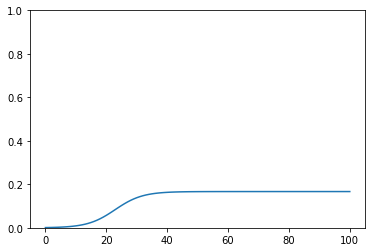

In [7]:
from matplotlib import pyplot as plt
plt.plot(p_allele_recursion(0.001, 0.80, 1, 0))
plt.ylim(0,1)

# Simulating Natural Selection & Genetic Drift 

In [26]:
order = np.random.randint(2)

0

In [96]:
import random
import numpy as np
def combine_ns_gd(p_a, W_AA, W_Aa, W_aa, N, ngens = 100): 
    p = [p_a]
    total_alleles = 2*N 
    order = np.random.randint(2, size = ngens)
    for i in range(ngens):
        if order[i] == 0:
            p0 = p[i]
            p1 = 1 - p0
            p_prime = (p0**2 * W_aa + p0*p1*W_Aa)/(p0**2 * W_aa + 2*p0*p1*W_Aa + p1**2 * W_AA)
            a_alleles = np.random.binomial(total_alleles, p_prime)
            p_prime = a_alleles/total_alleles
            p.append(p_prime)     
        else:
            a_alleles = np.random.binomial(total_alleles, p[i])
            p0 = a_alleles/total_alleles
            p1 = 1-p0
            p_prime = (p0**2 * W_aa + p0*p1*W_Aa)/(p0**2 * W_aa + 2*p0*p1*W_Aa + p1**2 * W_AA)
            p.append(p_prime) 
    return p

In [101]:
count = 0
for i in range(10000):
    p = combine_ns_gd(0.00005, 0.98, 0.99, 1, 500)
    if(p[100] == 0):
        count = count + 1

count/10000


0.9985

## Natural Selection Beneficial allele

In [ ]:
plt.plot(p_allele_recursion(0.1, 0.3, .7, .9))

# Simulating gene flow and natural selection

In [102]:
def p_allele_recursion_migration(m1, m2, p_a, W_AA1, W_Aa1, W_aa1, q_a, W_AA2, W_Aa2, W_aa2, ngens = 100):
    p = [p_a]
    q = [q_a]
    
    for i in range(ngens):
        pa = p[i]
        pA = 1 - pa
        
        qa = q[i]
        qA = 1 - qa
        
        p_prime = ((1-m1)*(pa**2 * W_aa1 + pa*pA*W_Aa1)/(pa**2 * W_aa1 + 2*pa*pA*W_Aa1 + pA**2 * W_AA1)) + m1*qa
        q_prime = ((1-m2)*(qa**2 * W_aa2 + qa*qA*W_Aa2)/(qa**2 * W_aa2 + 2*qa*qA*W_Aa2 + qA**2 * W_AA2)) + m2*pa
        p.append(p_prime)
        q.append(q_prime)
    return [p,q]

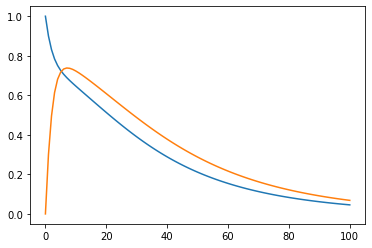

In [103]:
sim = p_allele_recursion_migration(0.1,0.3, 1, 1.1, 1, 0.9, 0, 0.9, 1, 1.1)
plt.plot(sim[0])
plt.plot(sim[1])